# Figure Notebook

All figures and results included in Irvine et al. (2020) can be produced by running this notebook, with the exception of figures 5 and 6. There have been issues with transitioning the code for figure 5 that have not been resolved and figure 6 was produced offline in adobe illustrator.

In [1]:
"""
Import needed libraries
"""

import numpy as np
import pandas as pd
from copy import copy
import sys
import my_shell_tools

# analysis
from scipy.stats import ttest_ind_from_stats
import itertools

# geomip_data
import os.path
# import cf
from netCDF4 import Dataset

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2

In [2]:
"""
Import all from projects python scripts
"""

from get_glens_data import *
from analysis import *
from plotting import *

In [3]:
"""
How much of this needed?
"""

# Directory and filenames for annual timeseries of 2D data
glens_dir = '../glens_data/'
glens_template = '{exp}.{run}.cam.h0.{var}.ann.{years}.nc'

vars_glens = ['TREFHT','TREFHTMX','P-E','PRECTMX','PRECT']
exps_glens = ['control','feedback']
years = ['2010-2029','2075-2094']

# year ranges which appears in filename
control_file_years = '201001-209912'
control_short_file_years = '201001-203012'
feedback_file_years = '202001-209912'

seas = 'ann'
stats = ['mean','std']

"""
Specify years of experiments and associated indices for annual files
"""

years_control = np.array([IDX + 2010 for IDX in range(90)])
years_feedback = np.array([IDX + 2020 for IDX in range(80)])

#Generate the indices for the range of years in each case.
# [0] added as a 2 element tuple with an array and an empty slot returned rather than an array
t_index_control = np.where((years_control > 2074) & (years_control < 2095))[0]
t_index_baseline = np.where((years_control > 2009) & (years_control < 2030))[0]
t_index_feedback = np.where((years_feedback > 2074) & (years_feedback < 2095))[0]

# Years when GLENS anom = half eventual cooling found using offline calculation with this function call: closest_years_to_frac_GLENS(0.5)
t_index_feedback_half = np.where((years_feedback > 2043) & (years_feedback < 2064))[0]
t_index_control_half = np.where((years_control > 2043) & (years_control < 2064))[0]


In [4]:
"""
Generate means and stds for all variables and cases
"""

# get lons, lats and weights
lons, lats, weights = get_lons_lats_weights()

# returnes (Means, Stds) for all cases and vars
all_data = get_all_cases_vars() # {(var,case)}
"""
CASES:
'Baseline'     - RCP8.5 @ 2010-2029
'RCP8.5'       - RCP8.5 @ 2075-2094
'Full-GLENS'   - GLENS  @ 2075-2094
'Half-GLENS'   - Scaled Half-GLENS  @ 2075-2094
'Baseline-2'   - RCP8.5 @ 2010-2029 W/ alternate runs
'Full-GLENS-2'   - GLENS @ 2075-2094 W/ alternate runs
'Half-GLENS-2'   - Scaled Half-GLENS @ 2075-2094 W/ alternate runs on GLENS (not on RCP8.5)
### NOT DONE ### 'Half-GLENS-time' - Shifted Half-GLENS @ 2075-2094 AND ?????
"""

# get weights and masks
all_masks = get_glens_masks_weights() # all_masks[masks]
"""
MASKS:
'land_frac' - Land fraction
'land_mask' - binary land mask where land fraction > 50%
'land_noice_frac' land fraction without Greenland or Antarctica
'land_noice_mask' - binary land mask without Greenland or Antarctica and where land fraction > 50%
    
WEIGHTS:
'pop' - gridcell weighting by population fraction
'ag' - gridcell weighting by agricultural land fraction
'area' - simple gridcell weighting by area
'land_area' - land area weighting using raw land area fraction (not mask)
'land_noice_area' - land area without Greenland and Antarctica weighting using raw land area fraction (not mask)
"""


"\nMASKS:\n'land_frac' - Land fraction\n'land_mask' - binary land mask where land fraction > 50%\n'land_noice_frac' land fraction without Greenland or Antarctica\n'land_noice_mask' - binary land mask without Greenland or Antarctica and where land fraction > 50%\n    \nWEIGHTS:\n'pop' - gridcell weighting by population fraction\n'ag' - gridcell weighting by agricultural land fraction\n'area' - simple gridcell weighting by area\n'land_area' - land area weighting using raw land area fraction (not mask)\n'land_noice_area' - land area without Greenland and Antarctica weighting using raw land area fraction (not mask)\n"

In [5]:
"""
Set standard plot options
"""

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'figure.figsize': cm2inch(8.5,8.5)})

# color guide here: https://www.w3schools.com/colors/colors_picker.asp
# color blender here: https://meyerweb.com/eric/tools/color-blend
red = '#ff0000'
l_red = '#ffc0c0' # old: '#ffd9d9'
blue = '#0066ff'
l_blue = '#c0c0ff' # old:'#b2d0ff'
purple = '#803380'
l_purple = '#C099C0' 

std_alpha = 0.2

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300 # set inline images to hi-res
%matplotlib inline

# INSERT FIGURE SECTIONS HERE

# Figure 1

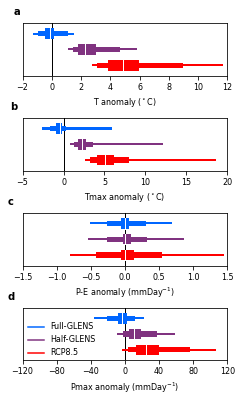

In [7]:
# %load figure_sections/fig_1.py

#customize ticks
import matplotlib.ticker as ticker

"""
Figure settings
"""

out_dir = '../figures/'

weight = 'land_noice_area'
out_filename = 'fig1'

# # For population-weighted version
# weight = 'pop'
# out_filename = 'fig1_pop'

quantiles = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]

"""
CASES:
'Baseline'     - RCP8.5 @ 2010-2029
'RCP8.5'       - RCP8.5 @ 2075-2094
'Full-GLENS'   - GLENS  @ 2075-2094
'Half-GLENS'   - Scaled Half-GLENS  @ 2075-2094
"""

def plot_data(var, case_a, case_b, weight_name, quantiles = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]):
    # returns weighted quantiles of the anomaly for plotting
    # take anomaly of means [0] element
    anom = all_data[(var, case_a)][0] - all_data[(var, case_b)][0]
    anom_flat = anom.flatten()
    weight_flat = all_masks[weight_name].flatten()
    # return weighted quantiles of distribution
    return weighted_quantile(anom_flat, quantiles, sample_weight=weight_flat)

def box_rectangles(axis, quantiles, y_loc, thick, color):

    thin = thick*0.5
    thinner = thick*0.2

    # create a rectangle
    patches = [
        # 1-99% range
        mpatches.Rectangle((quantiles[0],y_loc-0.5*thinner), quantiles[-1] - quantiles[0], thinner, facecolor=color, linewidth=0), ### Background
        # 5-95% range
        mpatches.Rectangle((quantiles[1],y_loc-0.5*thin), quantiles[-2] - quantiles[1], thin, facecolor=color, linewidth=0), ### Background
        # 25-75% range
        mpatches.Rectangle((quantiles[2],y_loc-0.5*thick), quantiles[-3] - quantiles[2], thick, facecolor=color, linewidth=0), ### Background
    ]
    for p in patches:
        axis.add_patch(p)

    axis.plot([quantiles[3],quantiles[3]],[y_loc-0.5*thick,y_loc+0.5*thick],'w',linewidth=1)
#end def

def boxplot_3(axis,bottom,mid,top,labels=False):
    """
    New GLENS style
    """
    
    # set y locations for bars
    y_bottom, y_mid, y_top = 0.2, 0.5, 0.8

    # set basic thickness
    thick = 0.2
    
    axis.set_ylim(0,1)
    axis.yaxis.set_major_locator(ticker.NullLocator())
    
    axis.plot([0,0],[0,1],'k',linewidth=1,zorder=0)
    
    # plot the shapes:
    box_rectangles(axis, bottom, y_bottom, thick, red)
    box_rectangles(axis, mid, y_mid, thick, purple)
    box_rectangles(axis, top, y_top, thick, blue)
#end def

"""
##################################
#
FIGURE 1 GLENS
#
##################################
"""

fig = plt.figure(figsize=cm2inch(8.5,14))

plt.rcParams.update({'font.size': 8})

def fig1_land(ax, var, mask):
    # get and then plot data
    RCP85_land = plot_data(var, 'RCP8.5', 'Baseline', weight)
    HALF_GLENS_land = plot_data(var, 'Half-GLENS', 'Baseline', weight)
    FULL_GLENS_land = plot_data(var, 'Full-GLENS', 'Baseline', weight)
    
    boxplot_3(ax, RCP85_land, HALF_GLENS_land, FULL_GLENS_land)

"""
TREFHT plot
"""
ax1 = fig.add_subplot(411)
ax=ax1

# plot data!
var = 'TREFHT'
xlims=[-2,12]
fig1_land(ax, var, weight)
    
# set axes labels and title
unit = '$^\circ$C'
plt.xlabel('T anomaly ({unit})'.format(unit=unit))
plt.xlim(xlims[0],xlims[1])

plt.text(1.3*xlims[0], 1.15, "a", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
TREFHTMX plot
"""
ax2 = fig.add_subplot(412)
ax=ax2

# plot data!
var = 'TREFHTMX'
xlims=[-5,20]
fig1_land(ax, var, weight)
    
# set axes labels and title
unit = '$^\circ$C'
plt.xlabel('Tmax anomaly ({unit})'.format(unit=unit))
plt.xlim(xlims[0],xlims[1])

plt.text(1.3*xlims[0], 1.15, "b", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
P-E plot
"""
ax3 = fig.add_subplot(413)
ax=ax3

# plot data!
var = 'P-E'
xlims = [-1.5,1.5]
fig1_land(ax, var, weight)
    
# set axes labels and title
unit = 'mmDay$^{-1}$'
plt.xlabel('P-E anomaly ({unit})'.format(unit=unit))
plt.xlim(xlims[0],xlims[1])

plt.text(1.15*xlims[0], 1.15, "c", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
PRECTMX plot
"""
ax4 = fig.add_subplot(414)
ax=ax4

# plot data!
var = 'PRECTMX'
xlims = [-120,120]
fig1_land(ax, var, weight)
    
# set axes labels and title
unit = 'mmDay$^{-1}$'
plt.xlabel('Pmax anomaly ({unit})'.format(unit=unit))
plt.xlim(xlims[0],xlims[1])

plt.text(1.15*xlims[0], 1.15, "d", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
Plot legend
"""
# use empty plots
plt.plot(0,0, color=blue, label='Full-GLENS')
plt.plot(0,0, color=purple, label='Half-GLENS')
plt.plot(0,0, color=red, label='RCP8.5')

plt.legend(frameon=False, loc=3, bbox_to_anchor=(-0.01, -0.08))

"""
Figure finalizing
"""

ax3.get_xaxis().set_ticks([-1.5,-1,-0.5,0,0.5,1.0,1.5])
ax4.get_xaxis().set_ticks([-120,-80,-40,0,40,80,120])
# ax3.get_xaxis().set_ticks([-2.5,-2,-1.5,-1,-0.5,0,0.5,1.0,1.5,2.0,2.5])
# ax4.get_xaxis().set_ticks([-160,-120,-80,-40,0,40,80,120,160])

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)

plt.savefig(out_dir+out_filename+'.png', format='png', dpi=480)
plt.savefig(out_dir+out_filename+'.eps', format='eps', dpi=480)

plt.show()


# Figure 2

To produce the "half-GLENS" version of this plot, change the following variables in the "define cases" section to this:

out_name = 'fig_2_Half-GLENS'

y_label = 'Half-GLENS anomaly (mmd$^{-1}$)'

cases = ['Half-GLENS','RCP8.5','Baseline']

You can also change the variables in the same place.

/home/pjirvine/.conda/envs/irvine_erl_20/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6920: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None
/home/pjirvine/.conda/envs/irvine_erl_20/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/home/pjirvine/.conda/envs/irvine_erl_20/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


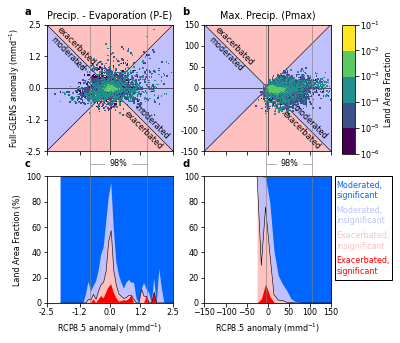

In [8]:
# %load figure_sections/fig_2.py

"""
2D histogram
"""

from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib import gridspec
import matplotlib.patches as patches

"""
Define function to get data in format for plot
"""

def sort_axes(axis, xlims, ylims, xnum_steps, ynum_steps, num_format='%0.1f'):
    
    axis.set_xlim(xlims)
    axis.set_ylim(ylims)

    axis.set_yticks(np.linspace(ylims[0],ylims[1],xnum_steps))
    axis.set_xticks(np.linspace(ylims[0],ylims[1],ynum_steps))

    axis.xaxis.set_major_formatter(ticker.FormatStrFormatter(num_format))
    axis.yaxis.set_major_formatter(ticker.FormatStrFormatter(num_format))

def add_lines(axis):
    axis.axhline(0, color='k',zorder=0, lw=0.6)
    axis.axvline(0, color='k',zorder=0, lw=0.6)
    axis.plot(xlims,xlims, color='k',zorder=0, lw=0.6)
    axis.plot([xlims[0],-1.*xlims[0]],[-1.*xlims[0],xlims[0]], color='k',zorder=0, lw=0.6)
    
def bw_off_plot_func(CO2_anom,values,mask,weight):
    
    # Calculate fraction of CO2 anom distribution across values with weighted mask
    bwd = np.array(fraction_distribution(CO2_anom[mask], values, sample_weight=weight[mask]))
    # Return 100* fraction of points at each interval that are masked
    return 100 * bwd / (total * np.sum(weight) / np.sum(weight[mask]))

def plot_angled_labels(xlims):
    #plots angled labels to indicate moderated / exacerbated
    
    start_loc = (0.8/1.5)*xlims[1]
    top_left = [-1.*start_loc,start_loc]
    bottom_right = [start_loc,-1.*start_loc]
    shift = (0.2/1.5)*xlims[1]
    plt.text(top_left[0]-shift,top_left[1],'moderated',ha='center',va='center',rotation=-45)
    plt.text(top_left[0],top_left[1]+shift,'exacerbated',ha='center',va='center',rotation=-45)
    plt.text(bottom_right[0]+shift,bottom_right[1],'moderated',ha='center',va='center',rotation=-45)
    plt.text(bottom_right[0],bottom_right[1]-shift,'exacerbated',ha='center',va='center',rotation=-45)

def plot_range_top(ylims, q_range=[0.01,0.99]):
    # plots the 1-99% range of data vertically
    
    range_1_99 = weighted_quantile(CO2_anom.flatten(), q_range, sample_weight=weight)
    
    plt.plot([range_1_99[0],range_1_99[0]],[ylims[1],1.4*ylims[0]],color='0.5', lw=0.6, clip_on=False)
    plt.plot([range_1_99[1],range_1_99[1]],[ylims[1],1.4*ylims[0]],color='0.5', lw=0.6, clip_on=False)
    
    plt.plot([range_1_99[0],range_1_99[1]],[1.2*ylims[0],1.2*ylims[0]],color='0.5', lw=0.6, clip_on=False)
    plt.text( (range_1_99[0]+range_1_99[1])/2.0,1.2*ylims[0],'98%',va='center',ha='center',
             clip_on=False, color='black', bbox=dict(facecolor='white', edgecolor='white'))
    
def plot_range_bottom(q_range=[0.01,0.99]):
    range_1_99 = weighted_quantile(CO2_anom.flatten(), q_range, sample_weight=weight)
    plt.axvline(x=range_1_99[0],color='0.5', lw=0.6)
    plt.axvline(x=range_1_99[1],color='0.5', lw=0.6)
    
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    #https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
    
"""
Cases to plot
"""

out_dir = '../figures/'

out_name = 'fig_2_Full-GLENS'
y_label = 'Full-GLENS anomaly (mmd$^{-1}$)'
cases = ['Full-GLENS','RCP8.5','Baseline']

# out_name = 'fig_2_Half-GLENS'
# y_label = 'Half-GLENS anomaly (mmd$^{-1}$)'
# cases = ['Half-GLENS','RCP8.5','Baseline']

var_1 = 'P-E'
var_2 = 'PRECTMX'

flipped = False

# for flipped reverse order of baseline and RCP8.5 and invert plots
if flipped:
    cases_new = [cases[0],cases[2],cases[1]]
    cases = cases_new

"""
settings
"""

var_1_xlims = [-2.5,2.5]
var_1_xnum_steps = 5
var_1_bottom_step = 0.1

var_1_ticks = [-2.5,-1.2,0,1.2,2.5]
var_1_ticklabels = ['-2.5','-1.2','0.0','1.2','2.5']

var_1_aspect = 5./100. # set so bottom panel has same aspect ratio as top

var_2_xlims = [-150,150]
var_2_xnum_steps = 7
var_2_bottom_step = 10.

var_2_ticks = [-150,-100,-50,0,50,100,150]
var_2_ticklabels = ['-150','-100','-50','0','50','100','150']

var_2_aspect = 300./100. # set so bottom panel has same aspect ratio as top

frac_100 = False
background = True
line_1_99_top = True
line_1_99_bottom = True
angled_labels = True

"""
Get mask
"""

weight = all_masks['land_noice_area'].flatten()

"""
Common settings
"""

bounds = [1.e-6,1.e-5,1.e-4,1.e-3,1.e-2,1.e-1]
labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$']

cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# g_cmap = plt.cm.gist_gray
# g_norm = mpl.colors.BoundaryNorm(bounds, g_cmap.N)

nbins = 200

"""
Create figure
"""

fig = plt.figure(figsize=cm2inch(15,13))
plt.rcParams.update({'font.size': 8})

"""
Start TOP
"""

"""
p-e no filter
"""

axis = fig.add_subplot(221)
ax_pe_top = axis

var = var_1

plt.title('Precip. - Evaporation (P-E)')

plt.axis('scaled')

sg_anom, CO2_anom, sg_CO2_anom, masks, weights, fractions = better_worse_full_data(all_data, cases[0], cases[1], cases[2], var, weight, anom_type='standard')
if flipped:
    CO2_anom = -1. * CO2_anom
    sg_anom  = -1. * sg_anom

# Set axes and add lines

xlims = var_1_xlims
ylims = xlims
xnum_steps = var_1_xnum_steps
ynum_steps = xnum_steps

sort_axes(axis, xlims, ylims, xnum_steps, ynum_steps, num_format='%0.1f')

add_lines(axis)

# produce plot

img = axis.hist2d(CO2_anom.flatten(), sg_anom.flatten(), bins=nbins, range = [xlims,ylims], weights=weight, norm=norm, cmap=cmap, cmin=bounds[0], cmax=bounds[-1])
# img = ax_pe.hist2d(CO2_anom[certain], SRM_anom[certain], bins=100, range = [xlims,ylims], weights=weight[certain], norm=norm, cmap=cmap, cmin=1.e-12)

if line_1_99_top:
    plot_range_top(ylims)

if angled_labels:
    plot_angled_labels(xlims)
    
plt.ylabel(y_label)

if background:
    axis.set_facecolor(l_red)
    axis.fill_between(xlims, ylims, [-1.*ylims[0],-1.*ylims[1]], color=l_blue, zorder=0, lw=0)

plt.text(1.35*xlims[0], 1.15*xlims[1], "a", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')
    
"""
precip 5 max
"""

axis = fig.add_subplot(222)
ax_p5_top = axis

var = var_2

plt.title('Max. Precip. (Pmax)')

plt.axis('scaled')

sg_anom, CO2_anom, sg_CO2_anom, masks, weights, fractions = better_worse_full_data(all_data, cases[0], cases[1], cases[2], var, weight, anom_type='standard')
if flipped:
    CO2_anom = -1. * CO2_anom
    sg_anom  = -1. * sg_anom

# Set axes and add lines

xlims = var_2_xlims
ylims = xlims
xnum_steps = var_2_xnum_steps
ynum_steps = xnum_steps

sort_axes(axis, xlims, ylims, xnum_steps, ynum_steps, num_format='%0.0f')

add_lines(axis)

# produce plot

img = axis.hist2d(CO2_anom.flatten(), sg_anom.flatten(), bins=nbins, range = [xlims,ylims], weights=weight, norm=norm, cmap=cmap, cmin=bounds[0], cmax=bounds[-1])

if line_1_99_top:
    plot_range_top(ylims)

if angled_labels:
    plot_angled_labels(xlims)
    
if background:
    axis.set_facecolor(l_red)
    axis.fill_between(xlims, ylims, [-1.*ylims[0],-1.*ylims[1]], color=l_blue, zorder=0, lw=0)
    
plt.text(1.35*xlims[0], 1.15*xlims[1], "b", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')
    
"""
Create BOTTOM figure
"""

"""
p-e no filter
"""

axis = fig.add_subplot(223)
ax_pe_mid = axis

# plt.title('Precip -Evap (mmd$^{-1}$)')

var = var_1

sg_anom, CO2_anom, sg_CO2_anom, masks, weights, fractions = better_worse_full_data(all_data, cases[0], cases[1], cases[2], var, weight, anom_type='standard')

xmin, xmax = var_1_xlims
step = var_1_bottom_step

values = np.arange(xmin, xmax+step, step) # need to extend just beyond end to add endpoint
centres = np.arange(xmin-step/2, xmax+step, step)

plt.ylim(0,100)
plt.xlim(xmin,xmax)

total = np.array(fraction_distribution(CO2_anom.flatten(), values, cumulative=False, sample_weight=weight))

better_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['better'],weight)
b_nosign_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['b_nosign'],weight) # better including non significant results
w_nosign_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['w_nosign'],weight) # worse "" ""
worse_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['worse'],weight)

# plot better
plt.fill_between(centres,100,100-b_nosign_plot,color=l_blue,lw=0)
plt.fill_between(centres,100,100-better_plot,color=blue,lw=0)
# plot worse
plt.fill_between(centres,0,w_nosign_plot,color=l_red,lw=0) # lw = 0 removes line at edges
plt.plot(centres,w_nosign_plot,color='k',lw=0.6)
plt.fill_between(centres,0,worse_plot,color=red,lw=0) # lw = 0 removes line at edges

if line_1_99_bottom:
    plot_range_bottom()

plt.ylabel('Land Area Fraction (%)')
plt.xlabel('RCP8.5 anomaly (mmd$^{-1}$)')

plt.text(1.35*var_1_xlims[0], 1.075*100, "c", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
precip 5 max
"""

axis = fig.add_subplot(224)
ax_p5_mid = axis

var = var_2

# plt.title('5 Day Max Precip (mmd$^{-1}$)')

sg_anom, CO2_anom, sg_CO2_anom, masks, weights, fractions = better_worse_full_data(all_data, cases[0], cases[1], cases[2], var, weight, anom_type='standard')

xmin, xmax = var_2_xlims
step = var_2_bottom_step

values = np.arange(xmin, xmax+step, step) # need to extend just beyond end to add endpoint
centres = np.arange(xmin-step/2, xmax+step, step)

plt.ylim(0,100)
plt.xlim(xmin,xmax)

total = np.array(fraction_distribution(CO2_anom.flatten(), values, cumulative=False, sample_weight=weight))

better_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['better'],weight)
b_nosign_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['b_nosign'],weight) # better including non significant results
w_nosign_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['w_nosign'],weight) # worse "" ""
worse_plot = bw_off_plot_func(CO2_anom.flatten(),values,masks['worse'],weight)

# plot better
plt.fill_between(centres,100,100-b_nosign_plot,color=l_blue,lw=0)
plt.fill_between(centres,100,100-better_plot,color=blue,lw=0)
# plot worse
plt.fill_between(centres,0,w_nosign_plot,color=l_red,lw=0) # lw = 0 removes line at edges
plt.plot(centres,w_nosign_plot,color='k',lw=0.6)
plt.fill_between(centres,0,worse_plot,color=red,lw=0) # lw = 0 removes line at edges

if line_1_99_bottom:
    plot_range_bottom()

plt.xlabel('RCP8.5 anomaly (mmd$^{-1}$)')

plt.text(1.35*var_2_xlims[0], 1.075*100, "d", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
add legend
"""

left_begin = 160
left_in = 3
bot_begin = 18

# Create a Rectangle patch
rect = patches.Rectangle((left_begin,bot_begin),135,82,linewidth=1,edgecolor='k',facecolor='white',clip_on=False)

# Add the patch to the Axes
ax_p5_mid.add_patch(rect)

plt.text(left_begin+left_in, 83, "Moderated,\nsignificant",clip_on=False, color=blue, 
         va="baseline", ha="left", multialignment="left")
plt.text(left_begin+left_in, 63, "Moderated,\ninsignificant",clip_on=False, color=l_blue,
         va="baseline", ha="left", multialignment="left")
plt.text(left_begin+left_in, 43, "Exacerbated,\ninsignificant",clip_on=False, color=l_red,
         va="baseline", ha="left", multialignment="left")
plt.text(left_begin+left_in, 23, "Exacerbated,\nsignificant",clip_on=False, color=red,
         va="baseline", ha="left", multialignment="left")

"""
Finish up figures
"""

fig.subplots_adjust(right=0.85)
# add_axes defines new area with: X_start, Y_start, width, height
cax = fig.add_axes([0.85,0.53,0.03,0.35])
cbar = fig.colorbar(img[3], cax=cax, ticks=bounds, format='%0.0e')
cbar.set_ticklabels(labels)
cbar.set_label('Land Area Fraction')

# reduce space between ticks and tick labels
ax_pe_top.tick_params(pad=2)
ax_p5_top.tick_params(pad=2)
ax_pe_mid.tick_params(pad=2)
ax_p5_mid.tick_params(pad=2)
cax.tick_params(pad=2)

# set PE ticks
ax_pe_top.get_xaxis().set_ticks(var_1_ticks)
ax_pe_mid.get_xaxis().set_ticks(var_1_ticks)
ax_pe_top.get_xaxis().set_ticklabels(var_1_ticklabels)
ax_pe_mid.get_xaxis().set_ticklabels(var_1_ticklabels)

ax_p5_top.get_xaxis().set_ticks(var_2_ticks)
ax_p5_top.get_yaxis().set_ticks(var_2_ticks)
ax_p5_mid.get_xaxis().set_ticks(var_2_ticks)

# hide top x axis tick labels
ax_pe_top.get_xaxis().set_ticklabels([])
ax_p5_top.get_xaxis().set_ticklabels([])

ax_pe_mid.set_aspect(var_1_aspect) # set so bottom panel has same aspect ratio as top
ax_p5_mid.set_aspect(var_2_aspect)

"""
colorbar articles:
https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.colorbar
https://matplotlib.org/users/colormapnorms.html
https://matplotlib.org/tutorials/colors/colorbar_only.html
https://stackoverflow.com/questions/21952100/setting-the-limits-on-a-colorbar-in-matplotlib
"""

fig.subplots_adjust(left=0.15, right=0.83, wspace = 0.2, hspace=0.2)

plt.savefig(out_dir+out_name+'.png', format='png', dpi=600)
plt.savefig(out_dir+out_name+'.eps', format='eps', dpi=600)
    
plt.show()


# Table 1

"Weight problem" warning can be ignored. It is a check to see if the weight adds to 1 but has been triggered by the final decimal point so isn't a problem.

In [9]:
# %load figure_sections/table_1.py
"""
Get better / worse off statistics for:
- land no ice area
- Full, half and perfect SG
- 90% T-Test, 80 years
"""

# output to here
table_dir = '../tables/'

weight = all_masks['land_noice_area']

case_combos = {'Full-GLENS': ['Full-GLENS','RCP8.5','Baseline'],
               'Half-GLENS': ['Half-GLENS','RCP8.5','Baseline'],
               'Perfect': ['Baseline-2','RCP8.5','Baseline'],
              }

def bwdk_format(fractions):
    better = 'better: ' + "{:4.2f}".format(fractions['better']*100.)
    worse = ' worse: ' + "{:4.2f}".format(fractions['worse']*100.)
    dont_know = ' dont_know: ' + "{:4.2f}".format(fractions['dont_know']*100.)
    return better + worse + dont_know

# create a dictionary to store output of variable loop
var_dict = {}
for var in vars_glens:
    
    # create a dict to store output of combo loop (wipes each var loop)
    combo_dict = {}
    for key, value in case_combos.items():
        sg_anom, co2_anom, sg_CO2_anom, masks, weights, fractions = better_worse_full_data(all_data, value[0], value[1], value[2], var, weight)
        combo_dict[key] = bwdk_format(fractions)
    
    # store combo dict in var dict
    var_dict[var] = combo_dict
#end fors

land_noice_out = pd.DataFrame.from_dict(var_dict).to_csv(table_dir+'GLENS_land_noice_bwoff.csv')


weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002
weight problem 1.0000000000000002


# Figure 4 (there is no 3).

There are 2 code-sections here, first we generate the data for the plot (time-consuming) then we plot.

In [10]:
# %load figure_sections/fig_4_data.py
"""
Code to generate input data for fraction summary figure
"""

def frac_figure_data(frac, var_list, all_data, all_masks, weight_name = 'land_noice_area', nyears=80, ttest_level=0.1):
    """
    function to generate a table of data to input to summary figure (fig "4" from NCC paper)
    """
    # Generate masks
    global_weight = all_masks['area'].flatten()
    weight = all_masks[weight_name].flatten()

    # create Dict to fill with data and then return
    inner_dict = {}
    
    #loop over all vars
    for var in var_list:

        """
        Generate Fraction-data
        """

        CO2_mean = all_data[var,'RCP8.5'][0].flatten()
        SRM_mean = all_data[var,'Full-GLENS'][0].flatten()
        CTRL_mean = all_data[var,'Baseline'][0].flatten()

        CO2_std = all_data[var,'RCP8.5'][1].flatten()
        SRM_std = all_data[var,'Full-GLENS'][1].flatten()
        CTRL_std = all_data[var,'Baseline'][1].flatten()

        """
        Generate Fraction-data
        """

        frac_mean = CO2_mean + frac*(SRM_mean - CO2_mean)
        frac_std = CO2_std + frac*(SRM_std - CO2_std)
        frac_anom = frac_mean - CTRL_mean

        """
        Generate fraction moderated / exacerbated
        """

        better, worse, dont_know = better_worse_off(frac_mean, frac_std, CO2_mean, CO2_std, CTRL_mean, CTRL_std, nyears, ttest_level)

        """
        Abs Frac Anom
        """
        
        abs_anom = abs(frac_anom)
        abs_std_anom = abs(frac_anom / CTRL_std)
        
        """
        Root-mean square
        """

        frac_anom_squared = frac_anom**2
        frac_std_anom_squared = (frac_anom / CTRL_std)**2
        RMS = ( np.sum(weight * frac_anom_squared) )**0.5
        RMS_std = ( np.sum(weight * frac_std_anom_squared) )**0.5

        """
        Fill dict with data
        """

        inner_dict[var+'_global'] = np.sum(frac_anom * global_weight)
        inner_dict[var+'_abs'] = np.sum(abs_anom * weight)
        inner_dict[var+'_abs_std'] = np.sum(abs_std_anom * weight)
        inner_dict[var+'_RMS'] = RMS
        inner_dict[var+'_RMS_std'] = RMS_std
        inner_dict[var+'_mod'] = np.sum(better.flatten() * weight)
        inner_dict[var+'_exa'] = np.sum(worse.flatten() * weight)
    #endfor var 
       
    # Return dict of output    
    return inner_dict
# end def frac_figure_data()

def dict_flipper(dict_to_flip):
    """
    Flips a 2-layer dictionary inside out
    """

    flip_dict = {}

    outer_keys = list(dict_to_flip.keys())
    inner_keys = list(dict_to_flip[outer_keys[0]].keys())

    for inner_key in inner_keys:
        
        temp_dict = {}

        for outer_key, inner_dict in dict_to_flip.items():
            temp_dict[outer_key] = inner_dict[inner_key]

        flip_dict[inner_key] = temp_dict
    
    # return flipped dict
    return flip_dict
#end def

"""
generate table of data for figure
"""

out_dir = "../tables/"

# Create an array of output from 0 to 1.5x GLENS
frac_array = np.arange(0.,1.51,0.01)

# fill a dictionary with the output
dict_variable = {round(FRAC,2):frac_figure_data(FRAC, vars_glens, all_data, all_masks) for FRAC in frac_array}

# Flip the dictionary around to have frac as the inner element
flip_dict = dict_flipper(dict_variable)

"""
Output Dict to CSV
"""

pd.DataFrame.from_dict(flip_dict).to_csv(out_dir + 'results_by_frac_GLENS.csv')

# END


global precip restored at: 72 %
TREFHT  RMS at 0.5: 0.49700382709228424  RMS at 1.0:  0.1043209549729426
TREFHT  RMS minimum: 0.10200196104373326  minimized at: 98 %
TREFHTMX  RMS at 0.5: 0.5058976873072821  RMS at 1.0:  0.23043560169246105
TREFHTMX  RMS minimum: 0.2210501147441013  minimized at: 94 %
P-E  RMS at 0.5: 0.6206379550075948  RMS at 1.0:  0.5162234461274032
P-E  RMS minimum: 0.49962455366553554  minimized at: 87 %
PRECTMX  RMS at 0.5: 0.486501718871503  RMS at 1.0:  0.29132680921281273
PRECTMX  RMS minimum: 0.2559608482433016  minimized at: 87 %


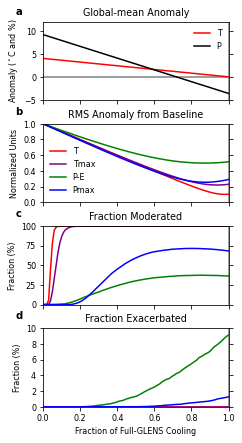

In [11]:
# %load figure_sections/fig_4.py
"""
Figure to plot RMS, etc. as a function of solar constant reduction
"""

out_dir = '../figures/'

# load up GeoMIP regional data
table_dir = '../tables/'
frac_pd = pd.read_csv(table_dir + 'results_by_frac_GLENS.csv')
frac_dict = frac_pd.to_dict()
# frac_pd = pd.DataFrame.from_csv(table_dir + 'results_by_frac_GLENS.csv')
# frac_dict = frac_pd.to_dict()

vars_all = ['TREFHT','TREFHTMX','P-E','PRECTMX','PRECT']
vars_no_p = ['TREFHT','TREFHTMX','P-E','PRECTMX']

metrics = ['global','RMS','RMS_std','mod','exa']

# x-axis
x = frac_dict['P-E_RMS'].keys()
x_axis = np.array(list(x))*0.01

"""
Begin Plots
"""

fig = plt.figure(figsize=cm2inch(8.5,18))
plt.rcParams.update({'font.size': 8})

var_cols = {'TREFHT':'red',
            'TREFHTMX':'purple',
            'PRECTMX':'blue',
            'P-E':'green',
            'PRECT':'black'}

var_labels = {'TREFHT':'T',
              'TREFHTMX':'Tmax',
              'PRECTMX':'Pmax',
              'P-E':'P-E',
              'PRECT':'P'}
            

"""
Global-mean plot
"""

ax1 = fig.add_subplot(411)

# generate control global-mean precip
control_precip = all_data['PRECT','Baseline'][0].flatten()
global_weight = all_masks['land_noice_area'].flatten()
control_global_precip = np.sum(control_precip * global_weight)

global_temp = frac_pd['TREFHT_global'].to_numpy()
global_precip_pc = 100.0 * (frac_pd['PRECT_global'].to_numpy() / control_global_precip)

print('global precip restored at:', np.abs(global_precip_pc).argmin(), "%")

plt.plot(x_axis, global_temp, color = var_cols['TREFHT'], label= var_labels['TREFHT'])
plt.plot(x_axis, global_precip_pc, color = 'k', label = 'P')


plt.xlim(0,1)
plt.ylim(-5,12)

plt.axhline(0.,color='gray',zorder=0)
plt.axvline(1.,color='gray',zorder=0)

plt.title('Global-mean Anomaly')
plt.ylabel('Anomaly ($^\circ$C and %)')

plt.legend(frameon=False)

plt.text(-0.15, 1.12*12, "a", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
RMS plot
"""

ax2 = fig.add_subplot(412)

for var in vars_no_p:
    
    RMS = frac_pd[var+'_RMS'] / frac_pd[var+'_RMS'][0]
    RMS = RMS.to_numpy()
    plt.plot(x_axis, RMS, color = var_cols[var], label= var_labels[var])
    print(var,' RMS at 0.5:', RMS[50], ' RMS at 1.0: ', RMS[100])
#     print(var,' RMS at 0.5:', RMS[0.5], ' RMS at 1.0: ', RMS[1.0])
    print(var,' RMS minimum:', RMS.min(), ' minimized at:', RMS.argmin(), "%")

plt.ylim(0,1)
plt.xlim(0,1)

plt.axvline(1.,color='gray',zorder=0)

plt.title('RMS Anomaly from Baseline')
plt.ylabel('Normalized Units')

plt.legend(frameon=False)

plt.text(-0.15, 1.12, "b", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

"""
Fraction moderated plot
"""

ax3 = fig.add_subplot(413)

for var in vars_no_p:
    
    mod = 100. * frac_pd[var+'_mod'].to_numpy()
    plt.plot(x_axis, mod, color = var_cols[var], label= var_labels[var])

plt.axvline(1.,color='gray',zorder=0)
    
plt.ylim(0,100)
plt.xlim(0,1)

plt.title('Fraction Moderated')
plt.ylabel('Fraction (%)')

plt.text(-0.15, 112, "c", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

# plt.legend(frameon=False)

"""
Fraction exacerbated plot
"""

ax4 = fig.add_subplot(414)

for var in vars_no_p:
    
    exa = 100. * frac_pd[var+'_exa'].to_numpy()
    plt.plot(x_axis, exa, color = var_cols[var], label= var_labels[var])

# plt.text(0.88,7,'half-SG',rotation=90)
plt.axvline(1.,color='gray',zorder=0)
    
plt.ylim(0,10)
plt.xlim(0,1)

plt.title('Fraction Exacerbated')
plt.ylabel('Fraction (%)')
plt.xlabel('Fraction of Full-GLENS Cooling')

plt.text(-0.15, 11.2, "d", clip_on=False, va="baseline", ha="left", fontsize=10, fontweight='bold')

# plt.legend(frameon=False)

"""
Tidy up figure
"""

ax1.get_xaxis().set_ticklabels([])
ax2.get_xaxis().set_ticklabels([])
ax3.get_xaxis().set_ticklabels([])

ax1.tick_params(axis='y', right=True)
ax2.tick_params(axis='y', right=True)
ax3.tick_params(axis='y', right=True)
ax4.tick_params(axis='y', right=True)

ax2.get_yaxis().set_ticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax4.get_yaxis().set_ticks([0, 2, 4, 6, 8, 10])

fig.subplots_adjust(left=0.18, right=0.95, hspace=0.3)

plt.savefig(out_dir+'fig_4.png', format='png', dpi=480)
plt.savefig(out_dir+'fig_4.eps', format='eps', dpi=480)

plt.show()

# 


/home/pjirvine/.conda/envs/irvine_erl_20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/pjirvine/.conda/envs/irvine_erl_20/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


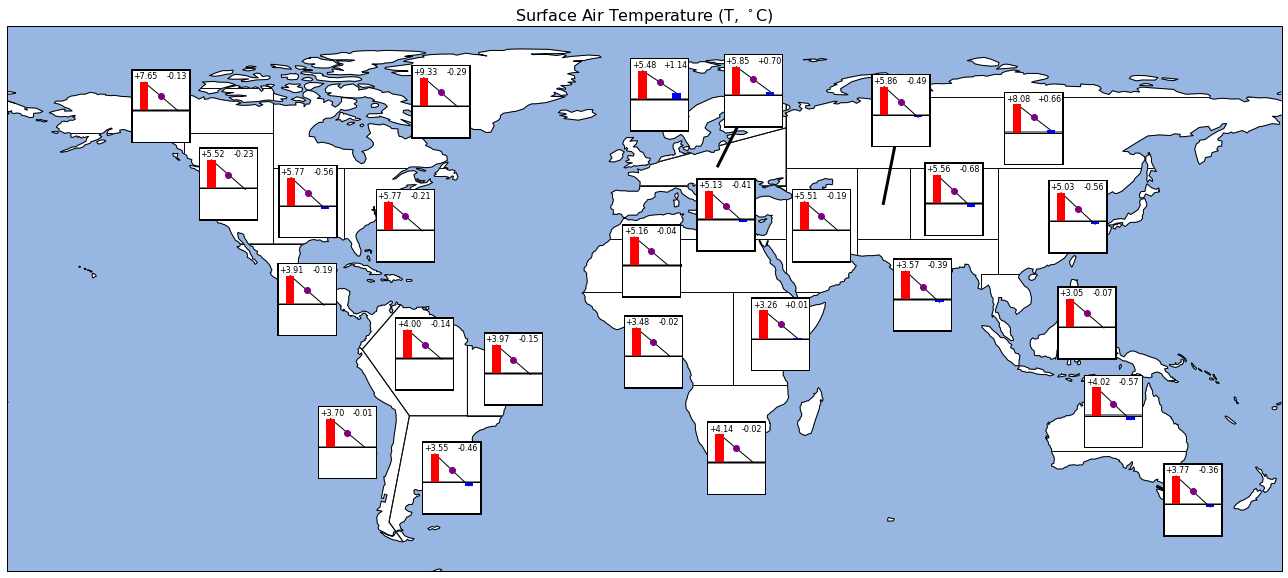

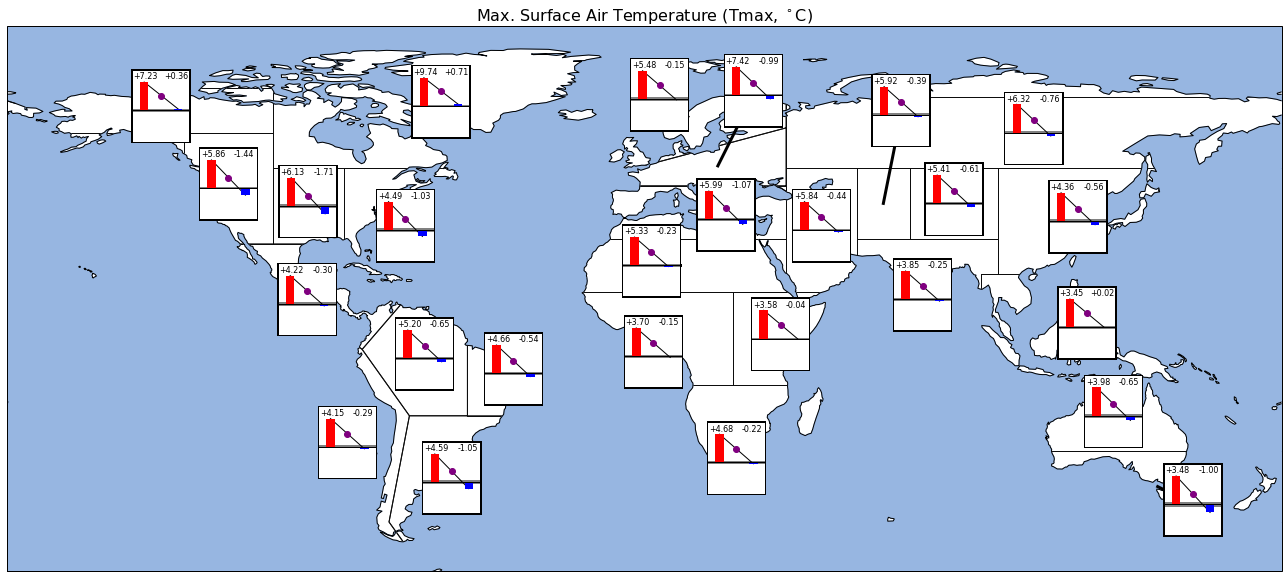

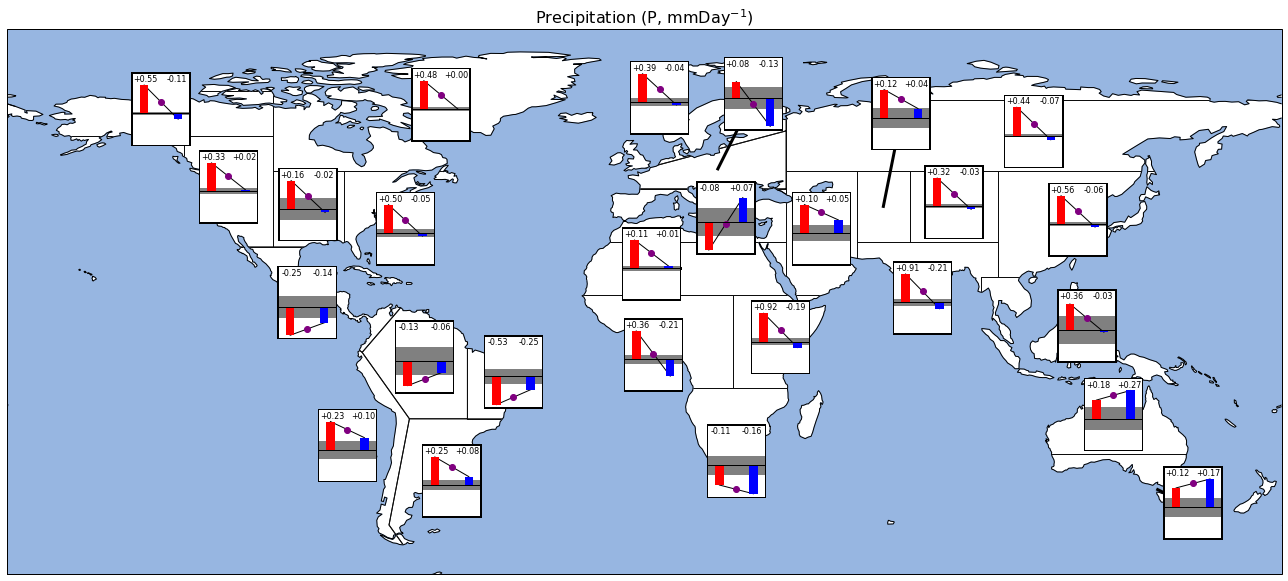

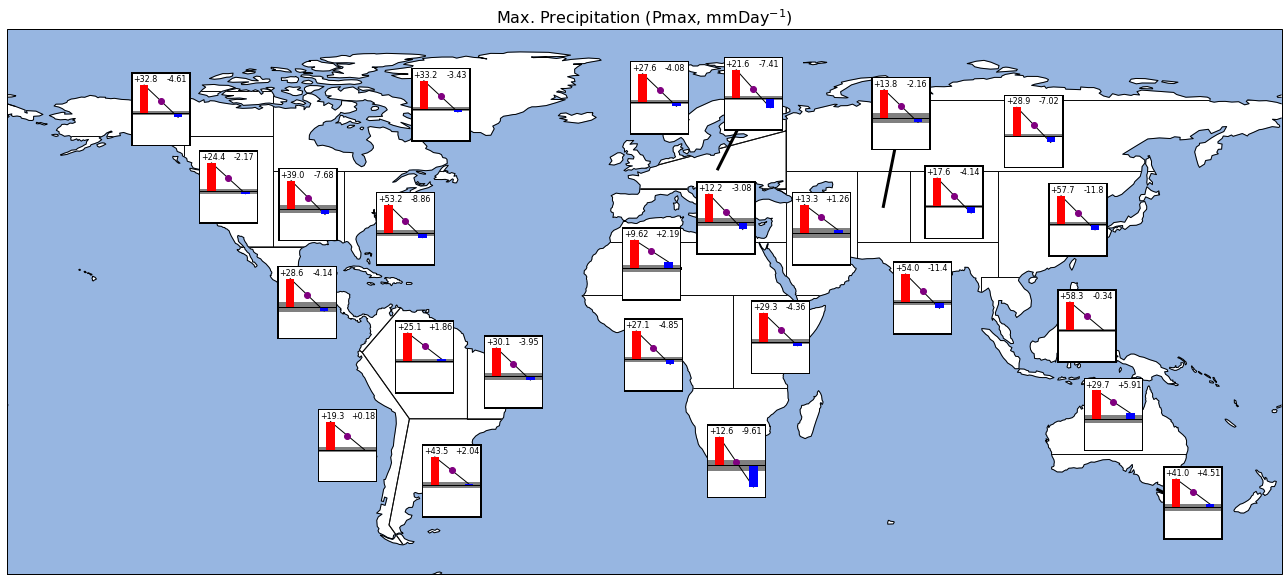

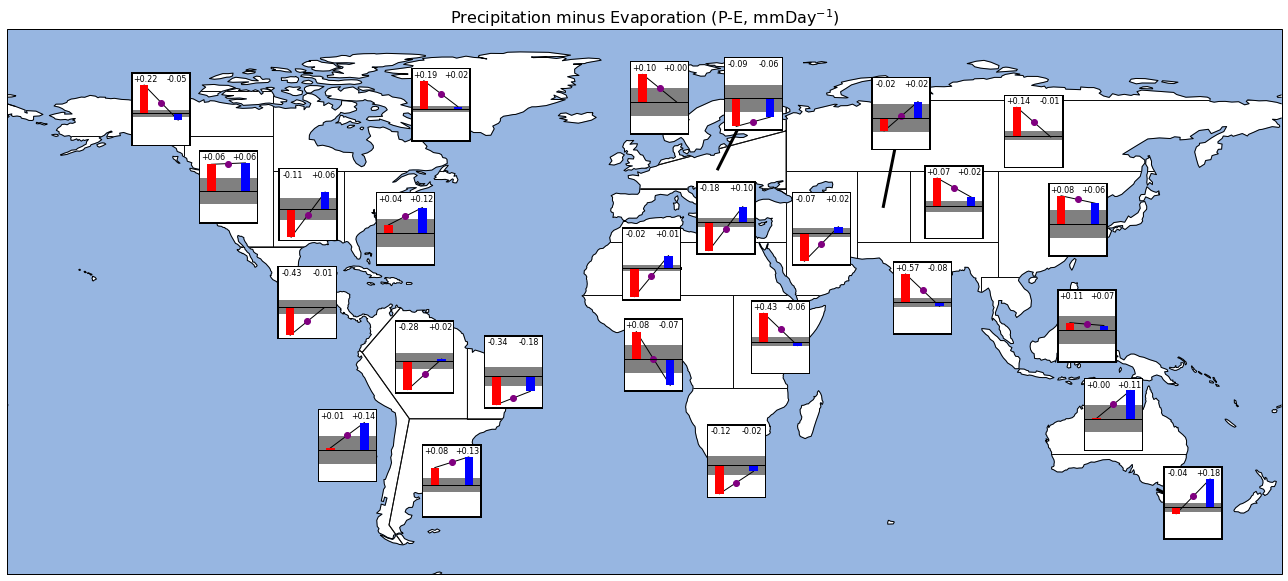

In [12]:
# %load figure_sections/srex_region_maps.py

"""
Set mask directories and names
"""

SREX_abvs = ['ALA', 'CGI', 'WNA', 'CNA', 'ENA', 'CAM', 'AMZ', 'NEB', 'WSA', 'SSA', 'NEU', 'CEU', 'MED', 'SAH', 'WAF', 'EAF', 'SAF', 'NAS', 'WAS', 'CAS', 'TIB', 'EAS', 'SAS', 'SEA', 'NAU', 'SAU']
SREX_names = ['Alaska', 'Canada and Greenland', 'Western North America', 'Central North America', 'Eastern North America', 'Central America', 'Amazon', 'North Eastern Brazil', 'Western South America', 'Southern South America', 'Northern Europe', 'Central Europe', 'Mediterannean', 'Sahara', 'Western Africa', 'Eastern Africa', 'Southern Africa', 'Northern Asia', 'Western Asia', 'Central Asia', 'Tibet', 'Eastern Asia', 'Southern Asia', 'South Eastern Asia', 'Northern Australia', 'Southern Australia']


# This function gets the region masks from the file, masks them and reshapes them 
# to match the data_shape given.

def get_regions_for_mean(region_fileloc, region_name_list, data_shape, mask=None):
    """
    This function gets the region masks from the file, masks them and reshapes them 
    to match the data_shape given.
    """
    
    # This Sub-function normalizes the input mask
    def region_mask_norm(region_data, mask=None):
        # change from % to fraction
        region_1 = np.copy(region_data) / 100.
        # apply mask if present
        if mask is None:
            pass
        else:
            region_1 = region_1 * np.transpose(mask)
        # normalize region
        return region_1 / np.sum(region_1)
    # End DEF
    
    # load region data
    region_nc = Dataset(region_fileloc)
    # make list of mask data for regions
    region_nc_data_list = [ region_nc.variables[ X ][:] for X in region_name_list]
    # Normalize region mask data
    region_data_n_list = [ region_mask_norm( X, mask=mask ) for X in region_nc_data_list]
    # Expand mask along time dimension to have same shape as data_nc_data
    region_data_exp_list = [ np.repeat(X, data_shape[0], axis=0) for X in region_data_n_list]
    
    return region_data_exp_list
#END DEF: get_regions_for_mean(region_fileloc, region_name_list, data_shape, mask=None)

def regional_means_stds(var, case):
    """
    This function calculates regional-mean timeseries over the SREX regions
    """
    
    data = ensemble_process(var,case, timeseries=True)[0] # [0] to select means

    # transpose data to match form of region mask data
    data = np.transpose(data)

    region_dir = '../glens_fix/'
    region_file = 'CCSM4_SREX_sep.nc'
    
    region_fileloc = region_dir + region_file
    region_data_list = get_regions_for_mean(region_fileloc, SREX_abvs, np.shape(data), mask=all_masks['land_mask'])

    # weighted (S)patial mean of regions (over time):
    region_mean_s_list = [ np.sum(data * X, axis=(1,2)) for X in region_data_list ]

    #calculate mean and standard deviation over time.
    region_time_mean_list = [ np.mean(X) for X in region_mean_s_list ]
    region_time_std_list = [ np.std(X) for X in region_mean_s_list ]

    # Store mean and standard deviation in dict, with regions as "rows"
    mean_dict = dict(zip(SREX_abvs,region_time_mean_list))
    std_dict = dict(zip(SREX_abvs,region_time_std_list))
    
    return mean_dict, std_dict
#end def: regional_means_stds(var, case)

def make_plot_data(var, regional_data_dict, anom_type='units', ttest_level=0.1, nyears=20):
    """
    ttest_level: 0.1 = 90%, nyears: 20 as ensemble mean for each year calculated, which reduces stddev
    """
    
    def num_stds_ttest(nobs, ttest_level, num=1000):
        import numpy as np
        from scipy.stats import ttest_ind_from_stats
        """
        reports number of stds to pass a t-test of a given level for a certain number of years
        ttest_level: 0.1 = 90%, 0.05 = 95%
        """

        xfactor = 1. / num

        results = np.array([ttest_ind_from_stats(X * xfactor, 1, nobs, 0, 1, nobs)[1] for X in range(num)])
        num_stds = np.array([X * xfactor for X in range(num)])

        # return number of STDs for T-Test
        return min( num_stds [ results < ttest_level ])
    
    SREX_abvs = ['ALA', 'CGI', 'WNA', 'CNA', 'ENA', 'CAM', 'AMZ', 'NEB', 'WSA', 'SSA', 'NEU', 'CEU', 'MED', 'SAH', 'WAF', 'EAF', 'SAF', 'NAS', 'WAS', 'CAS', 'TIB', 'EAS', 'SAS', 'SEA', 'NAU', 'SAU']
    SREX_names = ['Alaska', 'Canada and Greenland', 'Western North America', 'Central North America', 'Eastern North America', 'Central America', 'Amazon', 'North Eastern Brazil', 'Western South America', 'Southern South America', 'Northern Europe', 'Central Europe', 'Mediterannean', 'Sahara', 'Western Africa', 'Eastern Africa', 'Southern Africa', 'Northern Asia', 'Western Asia', 'Central Asia', 'Tibet', 'Eastern Asia', 'Southern Asia', 'South Eastern Asia', 'Northern Australia', 'Southern Australia']
    SREX_region_centres = [[-136.511,   66.277],[-57.5,  67.5],[-117.5  ,   44.283],[-95.   ,  39.283],[-72.5,  37.5],[-90.25802898,  16.60289305],[-62.05181777,  -3.75447446],[-42., -10.],[-75.89741775, -30.77603057],[-54.40601015, -38.77303345],[12.27138643, 64.46654867],[20.74534161, 50.5952795 ],[15. , 37.5],[10. , 22.5],[2.5   , 1.8175],[38.495 ,  1.8175],[ 20.995 , -23.1825],[110.,  60.],[50. , 32.5],[67.5, 40. ],[87.5, 40. ],[122.5,  35. ],[78.58108108, 17.90540541],[125.,   5.],[132.5, -20. ],[145., -40.]]
    
    # dictionary to hold plot data for each region
    SREX_plot_dict = {}
    for SREX in SREX_abvs:
        
        plot_dict = {} # temporary plot data dict
        
        plot_dict['name'] = SREX_names[SREX_abvs.index(SREX)] # use index from SREX_Abvs list to find matching entries
        plot_dict['centre'] = SREX_region_centres[SREX_abvs.index(SREX)]
        plot_dict['displace'] = [0,0] # these will be edited later
        
        # calculate various anomaly types
        
        # calculate number of STDs from control for 90% T-Test:
        num_ctrl_stds = num_stds_ttest(nyears, ttest_level)
        
        if anom_type == 'units':
            plot_dict['anom_85'] = regional_data_dict[var]['RCP8.5'][0][SREX] - regional_data_dict[var]['Baseline'][0][SREX]
            plot_dict['anom_GLENS'] = regional_data_dict[var]['Full-GLENS'][0][SREX] - regional_data_dict[var]['Baseline'][0][SREX]
            plot_dict['ttest_ctrl'] = num_ctrl_stds * regional_data_dict[var]['Baseline'][1][SREX]
        elif anom_type == 'pc':
            plot_dict['anom_85'] = 100. * ((regional_data_dict[var]['RCP8.5'][0][SREX] / regional_data_dict[var]['Baseline'][0][SREX]) - 1.0)
            plot_dict['anom_GLENS'] = 100. * ((regional_data_dict[var]['Full-GLENS'][0][SREX] / regional_data_dict[var]['Baseline'][0][SREX]) - 1.0)
            plot_dict['ttest_ctrl'] = 100. * ((num_ctrl_stds * regional_data_dict[var]['Baseline'][1][SREX]) / regional_data_dict[var]['Baseline'][0][SREX])
        elif anom_type == 'sd':
            plot_dict['anom_85'] = (regional_data_dict[var]['RCP8.5'][0][SREX] - regional_data_dict[var]['Baseline'][0][SREX]) / regional_data_dict[var]['Baseline'][1][SREX]
            plot_dict['anom_GLENS'] = (regional_data_dict[var]['Full-GLENS'][0][SREX] - regional_data_dict[var]['Baseline'][0][SREX]) / regional_data_dict[var]['Baseline'][1][SREX]
            plot_dict['ttest_ctrl'] = num_ctrl_stds
        else:
            print("anom_type not recognized: ", anom_type," please input: units, pc or sd")
            return
        
        # check whether RCP8.5 and GLENS are significantly different:
        ttest_plevel = ttest_sub(regional_data_dict[var]['RCP8.5'][0][SREX], regional_data_dict[var]['RCP8.5'][1][SREX], nyears, regional_data_dict[var]['Full-GLENS'][0][SREX], regional_data_dict[var]['Full-GLENS'][1][SREX], nyears)
        plot_dict['ttest_anoms'] = ttest_plevel < ttest_level
        
        # Evaluate type of anomaly relationship for region (e.g. better_off but flipped sign, etc.)
        plot_dict['full_type']= all_anom_relations(regional_data_dict[var]['Full-GLENS'][0][SREX], regional_data_dict[var]['Full-GLENS'][1][SREX],
                                                   regional_data_dict[var]['RCP8.5'][0][SREX], regional_data_dict[var]['RCP8.5'][1][SREX],
                                                   regional_data_dict[var]['Baseline'][0][SREX], regional_data_dict[var]['Baseline'][1][SREX],
                                                   nyears, ttest_level)
        plot_dict['half_type']= all_anom_relations(regional_data_dict[var]['Half-GLENS'][0][SREX], regional_data_dict[var]['Half-GLENS'][1][SREX],
                                                   regional_data_dict[var]['RCP8.5'][0][SREX], regional_data_dict[var]['RCP8.5'][1][SREX],
                                                   regional_data_dict[var]['Baseline'][0][SREX], regional_data_dict[var]['Baseline'][1][SREX],
                                                   nyears, ttest_level)
        
        # define function to specify number format - longwinded!
        def num_format(num, anom_type):
            from math import log10, floor
            def rounder(num, sig=3):
                return round(num, sig-int(floor(log10(abs(num))))-1)
            #enddef
            if abs(num)>=100:
                string = "{:+3.0f}".format(num)
            elif abs(num)>10:
                num_r = rounder(num, sig=3)
                string = "{:+3.1f}".format(num_r)
            elif abs(num)>1:
                num_r = rounder(num, sig=3)
                string = "{:+3.2f}".format(num_r)
            elif abs(num)>0.1:
                num_r = rounder(num, sig=2)
                string = "{:+3.2f}".format(num_r)
            else:
                num_r = rounder(num, sig=1)
                string = "{:+3.2f}".format(num_r)
            if anom_type == 'pc':
                string = string + "%"
            return string
                   
        plot_dict['anom_85_text'] = num_format(plot_dict['anom_85'],anom_type)
        plot_dict['anom_GLENS_text'] = num_format(plot_dict['anom_GLENS'],anom_type)
        
        SREX_plot_dict[SREX] = plot_dict
    # end for SREX_abvs
                   
    return SREX_plot_dict
#end def make_plot_data()

def num_region_types(plot_data):
    """
    This function returns a dictionary listing the number of regions with each type of anom relationship
    """

    # a mutually exclusive list of anomaly relationships 
    group_dict_exclusive_list=['dont_know_small','dont_know_big_none','dont_know_big_over',
                          'better_off_perfect','better_off_under','better_off_over',
                          'worse_off_novel','worse_off_exacerbate','worse_off_too_much']
    SREX_abvs = ['ALA', 'CGI', 'WNA', 'CNA', 'ENA', 'CAM', 'AMZ', 'NEB', 'WSA', 'SSA', 'NEU', 'CEU', 'MED', 'SAH', 'WAF', 'EAF', 'SAF', 'NAS', 'WAS', 'CAS', 'TIB', 'EAS', 'SAS', 'SEA', 'NAU', 'SAU']

    region_types_full = [plot_data[IDX]['full_type'] for IDX in SREX_abvs]
    region_types_half = [plot_data[IDX]['half_type'] for IDX in SREX_abvs]

    full_type_num_dict = {}
    half_type_num_dict = {}
    for anom_type in group_dict_exclusive_list:
        full_type_num_dict[anom_type] = len([IDX for IDX in region_types_full if IDX is anom_type])
        half_type_num_dict[anom_type] = len([IDX for IDX in region_types_half if IDX is anom_type])

    return full_type_num_dict, half_type_num_dict

"""
Create nested dictionary with regional means and stds.
To access data:
regional_data_dict[var][case][0/1][SREX_ABV]
[0] for mean, [1] for std
"""

"""
Create regional_data_dict
"""
case_list = ['Baseline','RCP8.5','Full-GLENS','Half-GLENS']

var_dict = {} # create dict to store loops output
for var in vars_glens:
    case_dict = {} # create dict to store loops output
    for case in case_list:
        case_dict[case] = regional_means_stds(var, case)
    var_dict[var] = case_dict

# Rename var_dict
regional_data_dict = var_dict

"""
Make data for each variable plot
"""

TREFHT_regions = make_plot_data('TREFHT', regional_data_dict, anom_type='units')
TREFHTMX_regions = make_plot_data('TREFHTMX', regional_data_dict, anom_type='units')
PRECTMX_regions = make_plot_data('PRECTMX', regional_data_dict, anom_type='units')
PRECT_regions = make_plot_data('PRECT', regional_data_dict, anom_type='units')
PE_regions = make_plot_data('P-E', regional_data_dict, anom_type='units')

"""
Specify Common plot_Region_dict updates
"""

displace_dict = {'CAM': [-5.0,-5.0],
                 'NEB': [5.0,2.0],
                 'ENA': [5.0,-5.0],
                 'WSA': [-8.,2.],
                 'WAF': [0.0,-5.0],
                 'SAF': [5.0,-10.0],
                 'SAH': [-8.0,0.0],
                 'MED': [8.0,-2.],
                 'CEU': [10.,20.0],
                 'NEU': [-8.,5.],
                 'CAS': [5.0,25.0],
                 'SAS': [0.0, -5.0],
                 'SAU': [10.,-5.],
                }

def plot_srex_region_map(var_regions,out_loc, title):
    """
    Function to plot srex region map
    """
    
    # Import
    import regionmask
    import cartopy.crs as ccrs
    
    # plot updates
    plt.rcParams.update({'font.size': 10})
    plt.rcParams.update({'figure.figsize': (18,9)}) # Square panels (2 across a page)
    
    def mini_panels(axis, plot_dict, half_width = 8):

        # extract values from plot_dict
        anom_1 = plot_dict['anom_85']
        anom_2 = plot_dict['anom_GLENS']
        ttest_anom = plot_dict['ttest_ctrl']
        x_loc, y_loc = plot_dict['centre']
        displace_x, displace_y = plot_dict['displace']
        text_1 = plot_dict['anom_85_text']
        text_2 = plot_dict['anom_GLENS_text']

        """
        Displace origin if needed and plot line
        """
        if plot_dict['displace'] != [0,0]:

            x_loc_orig, y_loc_orig = x_loc, y_loc

            x_loc = x_loc + displace_x
            y_loc = y_loc + displace_y

            axis.plot([x_loc,x_loc_orig],[y_loc,y_loc_orig],'k',linewidth=3, zorder=2)

        """
        Normalize anomalies for plotting
        """
        big_anom = max(abs(anom_1),abs(anom_2))
        norm_value = max(big_anom,abs(2.*ttest_anom))

        norm_anom_1 = anom_1 / norm_value
        norm_anom_2 = anom_2 / norm_value
        norm_ttest_anom = ttest_anom / norm_value

        # Set some plotting standards
        thick = 0.3
        bar_loc = 0.6
        text_shift = 0.05

        """
        Create the background and anomalies
        """
        patches = [
            # Black Border for Background
            mpatches.Rectangle((x_loc - 1.05*half_width,y_loc - 1.15*half_width), 2.1*half_width, 2.6*half_width, facecolor='k', linewidth=0, zorder=3),
            # White Background
            mpatches.Rectangle((x_loc - half_width,y_loc - 1.1*half_width), 2*half_width, 2.5*half_width, facecolor='white', linewidth=0, zorder=3),
            # Ttest grey bar
            mpatches.Rectangle((x_loc - half_width,y_loc - norm_ttest_anom * half_width), 2*half_width, 2.* norm_ttest_anom * half_width, facecolor='gray', linewidth=0, zorder=3),
            # Anom_1
            mpatches.Rectangle((x_loc - (bar_loc + 0.5*thick) * half_width,y_loc), thick*half_width, norm_anom_1 * half_width, facecolor='r', linewidth=0, zorder=4),
            # Anom_2
            mpatches.Rectangle((x_loc + (bar_loc - 0.5*thick) * half_width,y_loc), thick*half_width, norm_anom_2 * half_width, facecolor='b', linewidth=0, zorder=4),        
        ]
        for p in patches:
            axis.add_patch(p)

        """
        Add the lines
        """
        #zero line
        axis.plot([x_loc - half_width,x_loc + half_width],[y_loc,y_loc],'k',linewidth=1, zorder=5)

        #Between line
        axis.plot([x_loc - (bar_loc * half_width), x_loc + (bar_loc * half_width)],[y_loc + (norm_anom_1 * half_width),y_loc + (norm_anom_2 * half_width)],'k',linewidth=1, zorder=3)

        #Half-way Point
        axis.plot([x_loc],[y_loc + 0.5 * (norm_anom_1 + norm_anom_2) * half_width],color='purple', marker='.', markersize=12, zorder=4)

        """
        Add the text values
        """
        #text
        axis.text(x_loc - (bar_loc - text_shift) * half_width, y_loc + 1.05*half_width, text_1,  horizontalalignment='center', verticalalignment='bottom', fontsize=8, zorder=4)
        axis.text(x_loc + (bar_loc - text_shift) * half_width, y_loc + 1.05*half_width, text_2,  horizontalalignment='center', verticalalignment='bottom', fontsize=8, zorder=4)
        ### FIN ###
    #end def mini_panels()
    
    """
    Apply common updates to plot_dict
    """
    # Function to update plot_regions_dict
    def update_plot_regions(plot_regions_dict, plot_value, update_dict):
        for SREX, update_value in update_dict.items():
            plot_regions_dict[SREX][plot_value] = update_value
    #end def
    
    update_plot_regions(var_regions,'displace', displace_dict)

    """
    Create SREX mask used as base for summary plot
    """
    ax = regionmask.defined_regions.srex.plot(add_label=False, line_kws={'zorder':1, 'linewidth':1})
    plt.title(title, fontsize = 16)
    plt.tight_layout()

    """
    Plot mini-panels for each SREX region
    """
    for SREX in SREX_abvs:
        mini_panels(ax, var_regions[SREX])

    """
    Save Figure
    """    
    plt.savefig(out_loc+'.eps', format='eps', dpi=480)
    plt.savefig(out_loc+'.png', format='png', dpi=480)
    plt.show()
# end def

"""
Actually Make the Plots!
"""


out_dir = '../figures/'

# Plot T
plot_srex_region_map(TREFHT_regions,out_dir + 'TREFHT_SREX_region_map', 'Surface Air Temperature (T, $^\circ$C)')

# Plot Tmax
plot_srex_region_map(TREFHTMX_regions,out_dir + 'TREFHTMX_SREX_region_map', 'Max. Surface Air Temperature (Tmax, $^\circ$C)')

# Plot P
plot_srex_region_map(PRECT_regions,out_dir + 'PRECT_SREX_region_map', 'Precipitation (P, mmDay$^{-1}$)')

# Plot Pmax
plot_srex_region_map(PRECTMX_regions,out_dir + 'PRECTMX_SREX_region_map', 'Max. Precipitation (Pmax, mmDay$^{-1}$)')

# Plot P-E
plot_srex_region_map(PE_regions,out_dir + 'P-E_SREX_region_map', 'Precipitation minus Evaporation (P-E, mmDay$^{-1}$)')


# I've not been able to get the Region Bar-plot Figure to work, so it has been excluded.
Code for this figure is in "figure_sections/srex_region_maps.py"

# !!! End of Paper Code !!!

# Below is some potentially useful code for opening nextcdf, checking content and mapping results


In [ ]:
"""
Example netcdf file of annual series + gather lons and lats
"""

"""
variables(dimensions): float64 time(time), float64 time_bnds(time,bnds), 
    float64 lat(lat), float64 lon(lon), float64 gw(lat), float64 ch4vmr(time), 
    float64 co2vmr(time), int32 ndcur(time), int32 date(time), int32 nscur(time), 
    float64 sol_tsi(time), int32 nsteph(time), float64 f11vmr(time), float64 n2ovmr(time), 
    int32 datesec(time), float64 f12vmr(time), float32 TREFHT(time,lat,lon)
"""

var='TREFHT'
exp='control'
run='001'
file_years='201001-209912'

glens_dir = '../glens_data/'
glens_filename = '{exp}.{run}.cam.h0.{var}.ann.{years}.nc'.format(exp=exp,run=run,var=var,years=file_years)

glens_fileloc = glens_dir + glens_filename
test_nc = Dataset(glens_fileloc)

lons = np.array(test_nc.variables['lon'][:])
lats = np.array(test_nc.variables['lat'][:])

# grid-weights by latitude
gw = test_nc.variables['gw'][:]
gw_2D = np.tile(gw, (lons.size,1))
gw_2D = gw_2D / np.sum(gw_2D)

In [ ]:
# #Get example netcdf
# glens_dir = '../glens_data/'
# glens_filename = 'control.001.cam.h0.TREFHT.ann.201001-209912.nc'
# glens_fileloc = glens_dir + glens_filename
# test_nc = Dataset(glens_fileloc)

fix_dir = '../glens_fix/'
filename = 'sftlf_CCSM4.nc'
test_nc = Dataset(fix_dir + filename)

nc_data = test_nc.variables['sftlf'][:].transpose()

In [ ]:
nc_data.shape

In [ ]:
    """
    MASKS:
    'land_mask' - binary land mask where land fraction > 50%
    'land_noice_mask' - binary land mask without Greenland or Antarctica and where land fraction > 50%
    WEIGHTS:
    'pop' - gridcell weighting by population fraction
    'ag' - gridcell weighting by agricultural land fraction
    'area' - simple gridcell weighting by area
    'land_area' - land area weighting using raw land area fraction (not mask)
    'land_noice_area' - land area without Greenland and Antarctica weighting using raw land area fraction (not mask)
    """

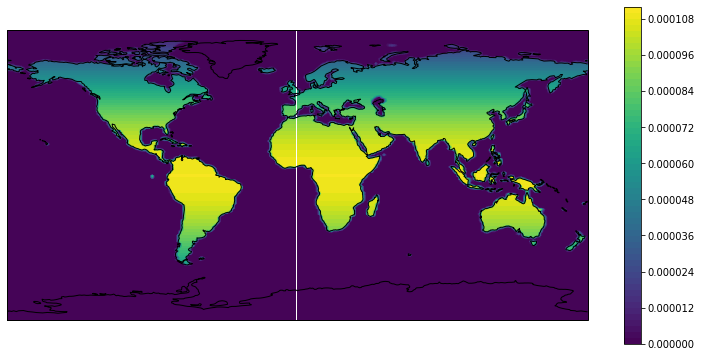

masked_array(
  data=[[-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0],
        [-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0],
        [-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0],
        [-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0],
        [-0.0, -0.0, -0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20)

In [15]:
"""
Example cartopy plot

http://earthpy.org/tag/cartopy.html
https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/advanced_plotting.html
"""

import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs

from cartopy.util import add_cyclic_point

# #Get example netcdf
# glens_dir = '../glens_data/'
# glens_filename = 'control.001.cam.h0.TREFHT.ann.201001-209912.nc'
# glens_fileloc = glens_dir + glens_filename
# test_nc = Dataset(glens_fileloc)

# nc_data = test_nc.variables['TREFHT'][:].transpose()
# data = np.mean(nc_data,2)

# data = all_masks['land_noice_mask'].transpose()
mask = all_masks['land_noice_area']#.transpose()

data = mask
# data = (all_data[('TREFHT','RCP8.5')][0] - all_data[('TREFHT','Baseline')][0])
# data = all_data[('P-E','Baseline')][0] * (all_data[('P-E','Baseline')][0] < 0) * (all_data[('P-E','Baseline')][0] > -0.5) * mask
# data = all_data[('P-E','Full-GLENS')][0] * (all_data[('P-E','Full-GLENS')][0] < 0) * (all_data[('P-E','Full-GLENS')][0] > -1.0) * mask
# data = all_data[('P-E','RCP8.5')][0] * (all_data[('P-E','RCP8.5')][0] < 0) * (all_data[('P-E','RCP8.5')][0] > -1.0) * mask
# data = np.transpose(all_masks['land_frac'])

fig = plt.figure(figsize=(13,6.2))  
# ax = plt.subplot(111, projection=ccrs.PlateCarree())

ax = plt.axes(projection=ccrs.PlateCarree())

# plt.figure(figsize=(13,6.2))  
# ax = plt.subplot(111, projection=ccrs.PlateCarree())

lons2d, lats2d = np.meshgrid(lons, lats)

CS = plt.contourf(lons2d, lats2d, data.transpose(), 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

fig.colorbar(CS) #cm.ScalarMappable(),ax=ax)

plt.show()

data

In [ ]:
plt.imshow(all_data[('P-E','RCP8.5')][0])